# Содержание
    
[Описание проекта](#project)

1. [Загрузка данных и их подготовка к исследованию](#start)
 
2. [Приоритизация гипотез.](#heposis)

    2.1. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#heposis1)
 
    2.2. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#heposis2)

    2.3. [Как изменилась приоритизация гипотез при применении RICE вместо ICE.](#heposis3)
    
3.  [Исследовательский анализ A/B-теста.](#analysis)

    3.1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#analysis1)

    3.2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#analysis2)

    3.3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#analysis3)
    
    3.4. [Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.](#analysis4)
    
    3.5. [Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.](#analysis5)
    
    3.6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#analysis6)
    
    3.7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#analysis7)
    
    3.8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#analysis8)
    
    3.9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#analysis9)
    
    3.10. [Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.](#analysis10)
    
    3.11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#analysis11)
    
    3.12. [Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.](#analysis12)
    
    3.13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#analysis13)
    
    3.14. [Примите решение по результатам теста и объясните его.](#analysis14)

4. [Выводы по исследованию.](#rec)


<a id="project"></a> 
# Описание проекта

Подготовка списка гипотез для увеличения выручки.

Задача исследования — приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель исследования - принять решение по результатам теста.** Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.**

**Описание данных**

Данные для первой части
Файл `'/datasets/hypothesis.csv'`:
- `'Hypothesis'` — краткое описание гипотезы;
- `'Reach'` — охват пользователей по 10-балльной шкале;
- `'Impact'` — влияние на пользователей по 10-балльной шкале;
- `'Confidence'` — уверенность в гипотезе по 10-балльной шкале;
- `'Efforts'` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Данные для второй части
Файл `'/datasets/orders.csv'`:
- `'transactionId'` — идентификатор заказа;
- `'visitorId'` — идентификатор пользователя, совершившего заказ;
- `'date'` — дата, когда был совершён заказ;
- `'revenue'` — выручка заказа;
- `'group'` — группа A/B-теста, в которую попал заказ.

Файл `'/datasets/visitors.csv'`:
- `'date'` — дата;
- `'group'` — группа A/B-теста;
- `'visitors'` — количество пользователей в указанную дату в указанной группе A/B-теста

Импорт необходимых для работы библиотек.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None) #код, который выводит максимальную ширину столбцов таблицы
pd.options.display.max_colwidth = 150
pd.set_option('display.max_columns', None) #код, который выводит все колонки таблицы
pd.options.display.float_format = '{:.2f}'.format #код отображает float с двумя знаками после точки

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.color_palette('tab20')

import matplotlib.pyplot as plt

import numpy as np
import math as mth

from datetime import datetime, timedelta

from IPython.display import display_html#библиотеки, использовались для вывода сразу нескольких доблиц в строке
from ipywidgets import widgets, Layout#


import datetime as dt
import scipy.stats as stats

### Загрузка данных и их подготовка к исследованию
<a id="start"></a> 

**Открытие файлов с данными и изучение общей информации.**

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
#функция для ознакомления с основной информацией
def information_df(metod): 
    print('Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.')
    display(metod.head())
    print('-'* 25)    
    print('Выведем основную информацию таблицы с помощью метода info().')
    print(' ')
    display(metod.info())
    print('-'* 25)
    print('Количество явных дубликатов  в таблице:', metod.duplicated().sum())
    print('-'* 25)
    print('Количество пропущенных значений в таблице:')
    display(metod.isna().sum())

In [4]:
information_df(hypothesis)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
information_df(orders)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [6]:
information_df(visitors)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

-------------------------
Количество явных дубликатов  в таблице: 0
-------------------------
Количество пропущенных значений в таблице:


date        0
group       0
visitors    0
dtype: int64

**Переименуем названия столбцов в таблицах, приводя их к "змеиному_регистру", и изменим тип данных в необходимых столбцах.**

In [7]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]

orders = orders.rename( 
 columns={'transactionId': 'transaction_id', 'visitorId':'visitor_id'})

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
display(orders.dtypes)
display(visitors.dtypes)

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

date        datetime64[ns]
group               object
visitors             int64
dtype: object

**Проверка исходных данных на наличие аномалий.**

Проверим, есть ли в исходных данных строки с аномальными значениями.

In [10]:
print('Строки таблицы orders с отрицательной или нулевой суммой заказа:', len(orders[orders['revenue'] <= 0]))

print('Строки таблицы visitors с отрицательным посещением:', len(visitors[visitors['visitors'] < 0]))

print(
    'Строки таблицы hypothesis с отрицательной оценкой:', 
    len(hypothesis[(hypothesis['reach'] <= 0) | (hypothesis['impact'] <= 0) | 
                   (hypothesis['confidence'] <= 0) | (hypothesis['efforts'] <= 0)])
)

Строки таблицы orders с отрицательной или нулевой суммой заказа: 0
Строки таблицы visitors с отрицательным посещением: 0
Строки таблицы hypothesis с отрицательной оценкой: 0


Проверим временной интервал таблиц orders и visitors на наличие аномальных дат.

In [11]:
print('Временной интервал таблицы orders:', \
      orders['date'].min().strftime('%d/%m/%Y'), '-', \
      orders['date'].max().strftime('%d/%m/%Y'))

print('Временной интервал таблицы visitors:', \
      visitors['date'].min().strftime('%d/%m/%Y'), '-', \
      visitors['date'].max().strftime('%d/%m/%Y'))

Временной интервал таблицы orders: 01/08/2019 - 31/08/2019
Временной интервал таблицы visitors: 01/08/2019 - 31/08/2019


**Проверка распределения пользователей на группы по `'visitor_id'`.**

In [12]:
buyers_All = orders[orders['group']=='A'].groupby('visitor_id').agg({'transaction_id': 'first'})
buyers_Bll = orders[orders['group']=='B'].groupby('visitor_id').agg({'transaction_id': 'first'})
dubl = buyers_All.merge(buyers_Bll, on='visitor_id').reset_index()
non_ID = list(dubl['visitor_id'])
len(non_ID)

58

При анализе данных, было выявлено, что 58 пользователей с уникальным 'visitor_id' на протяжении исследуемого периода попали как в одну, так и во вторую группу. Следовательно, неизвестно, в какой из групп пользователь принял решение, влияющее на тест. Примем решение убрать уникальные 'visitor_id', попавшие в обе группы из теста.

Найдем количество пользователей в каждой группе.

In [13]:
display(orders.groupby('group')['visitor_id'].nunique())

group
A    503
B    586
Name: visitor_id, dtype: int64

Распределение пользователей между группами имеет явно выраженный перевес в сторону группы B.

**Вывод по предобработке**

На данном этапе выполено следующее:

 - Откорректированы названия столбцов.

 - Изменены типы данных в столбцах.

 - Проверены данные на аномальные значения.

 - Найдено некорректное распределение пользователей между группами, а также неравномерное деление этих групп.

In [14]:
#orders = orders.drop (index= 425 ) #выброс в заказе в группе B

### Приоритизация гипотез.
<a id="heposis"></a> 

В файле `'/datasets/hypothesis.csv'` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `'Reach'`, `'Impact'`, `'Confidence'`, `'Effort'`.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>ICE и RICE</b><br>
ICE — один из самых популярных способов приоритизации задач. У этого метода есть модификация RICE.: 
<ul>    
    
- `'Reach`' — скольких пользователей затронет изменение, которое вы хотите внести;
    
- `'Impact`' — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
    
- `'Confidence`' — насколько вы уверены, что это изменение повлияет на пользователей именно так;
    
- `'Efforts`' — сколько стоит протестировать эту гипотезу. </ul>

</div> <br>


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid green;" />

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="heposis1"></a> 

In [15]:
hypothesis_ICE = hypothesis.copy()

hypothesis_ICE['ICE'] = (
    (hypothesis_ICE['impact'] * hypothesis_ICE['confidence'])
    / hypothesis_ICE['efforts']
)

hypothesis_ICE = hypothesis_ICE.sort_values('ICE', ascending=False)
hypothesis_ICE

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


После применения фреймворка ICE для приоритизации гипотез были получены такие результаты:

Наибольший приоритет необходимо отдать гепотизе: **"Запустить акцию, дающую скидку на товар в день рождения"**. 

Также среди остальных гипотез, приоритетными можно назвать :
**"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".**


#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="heposis2"></a> 

In [16]:
hypothesis_RICE = hypothesis.copy()

hypothesis_RICE['RICE'] = (
    (hypothesis_RICE['reach'] * hypothesis_RICE['impact'] * hypothesis_RICE['confidence'])
    / hypothesis_RICE['efforts']
)

hypothesis_RICE = hypothesis_RICE.sort_values('RICE', ascending=False)
hypothesis_RICE

,hypothesis,reach,impact,confidence,efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.00


После применения фреймворка RICE для приоритизации гипотез были получены такие результаты:

Наибольший приоритет необходимо отдать гепотизе: **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".**

Также среди остальных гипотез, приоритетными можно назвать : **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** и **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".**

#### Как изменилась приоритизация гипотез при применении RICE вместо ICE.
<a id="heposis3"></a> 

На визуализации можно наблюдать, как изменяется пиритизация гипотез исходя из параметров RICE и ICE.

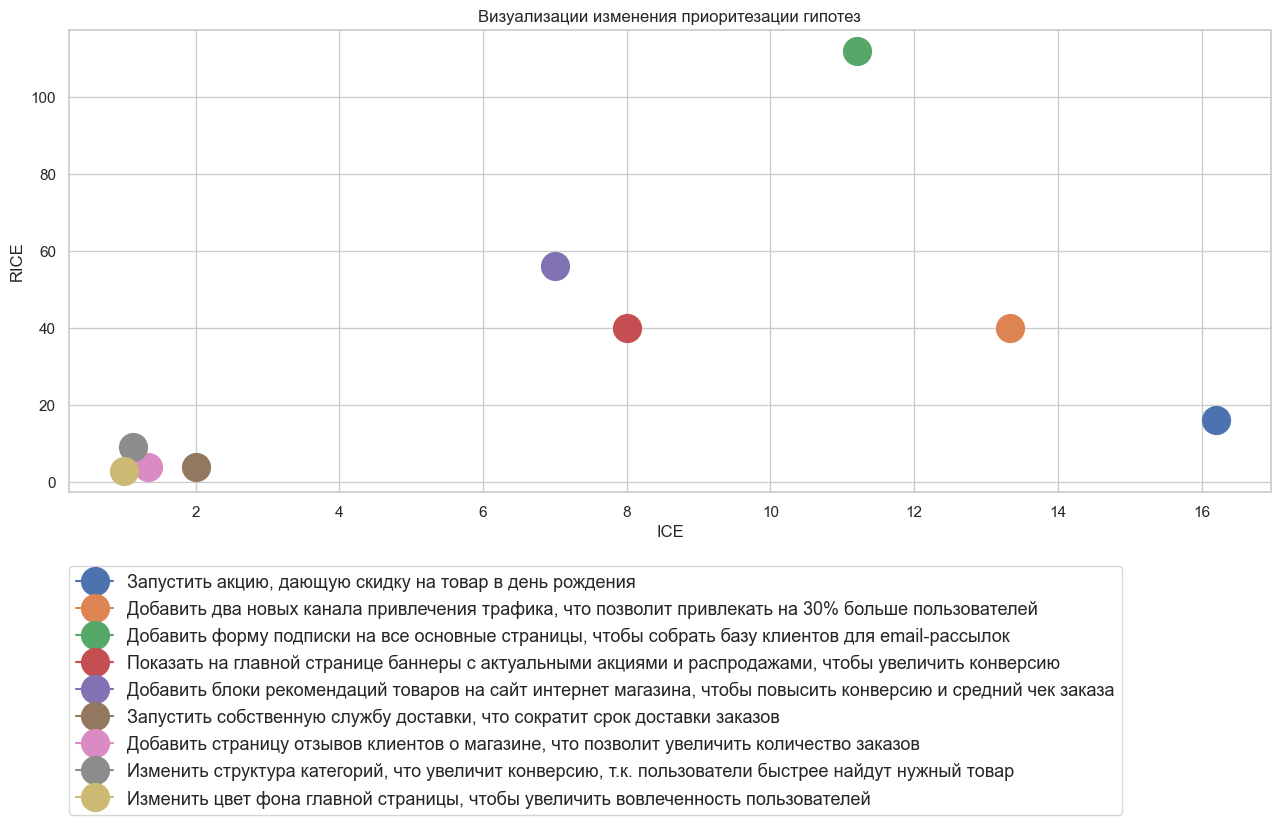

In [17]:
hpths = list(hypothesis_ICE['hypothesis'])
df = hypothesis_ICE[['hypothesis', 'ICE']].merge(hypothesis_RICE[['hypothesis', 'RICE']], on='hypothesis')

fig, ax = plt.subplots(1, figsize=(15.5,6))
for i in hpths:
    temp = df[df['hypothesis'] == i]
    plt.plot(temp.ICE, temp.RICE, marker='o', markersize=20)
plt.legend(hpths, fontsize=13, loc=(0, -0.7))
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.title('Визуализации изменения приоритезации гипотез')
plt.show()

**Рассчитав приоритезацию гипотез по фреймворку ICE и RICE стреди тройки лидеров и по одному и по второму были гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".** 

Также при расчете ICE наибольшее количество баллов было у гипотезы "Запустить акцию, дающую скидку на товар в день рождения". А при расчете RICE второе место в лидерстве получила гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".

Изменение в приоритизации произошло из-за добавления в расчеты параметра 'reach', отвечающего за охват пользователей. Так как у гипозы "Запустить акцию, дающую скидку на товар в день рождения" охват пользователей небольшой, то и ее позиция при расчете RICE значительно снизилась.


### Анализ A/B-теста.
<a id="analysis"></a> 

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируйте A/B-тест:

Составим общую таблицу со всеми необходимыми для анализа метриками.

In [18]:
#составим таблицу с количеством посетителей по дням в группе А
visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_A']

#составим таблицу с кумулятивным количеством посетителей в группе А
visitors_cummulative_A = visitors_A.apply(
    lambda x: visitors_A[visitors_A['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_A': 'sum'}),
    axis=1,
)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

#составим таблицу с количеством посетителей по дням в группе В
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_B']

#составим таблицу с кумулятивным количеством посетителей в группе В
visitors_cummulative_B = visitors_B.apply(
    lambda x: visitors_B[visitors_B['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_B': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

#составим таблицу с количеством заказов, выручкой по дням в группе А
orders_A = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
orders_A.columns = ['date', 'orders_A', 'revenue_A']

#составим таблицу с кумулятивным количеством заказов, кумулятивной выручкой в группе А
orders_cummulative_A = orders_A.apply(
    lambda x: orders_A[orders_A['date'] <= x['date']].agg(
        {'date': 'max', 'orders_A': 'sum', 'revenue_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_A.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

#составим таблицу с количеством заказов, выручкой по дням в группе А
orders_B = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
orders_B.columns = ['date', 'orders_B', 'revenue_B']

#составим таблицу с кумулятивным количеством заказов, кумулятивной выручкой в группе В
orders_cummulative_B = orders_B.apply(
    lambda x: orders_B[orders_B['date'] <= x['date']].agg(
        {'date': 'max', 'orders_B': 'sum', 'revenue_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_B.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

#объединим предыдущие таблицы в одну, объединив их по общему столбцу "date"
data = (
    orders_A.merge(
        orders_B, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
    .merge(visitors_A, left_on='date', right_on='date', how='left')
    .merge(visitors_B, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_A,revenue_A,orders_B,revenue_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_A,visitors_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


Составлена таблица с количеством посетителей, заказов, выручки по дням, а также кумулятивное количество посетителей, заказов и комулятивная выручка в разрезе для каждой группы.


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
<a id="analysis1"></a> 

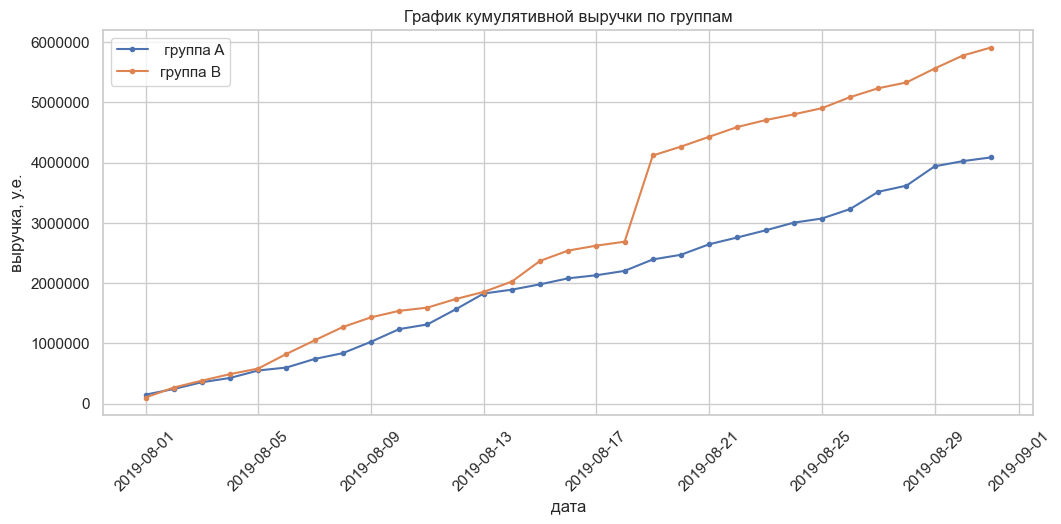

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(
    data['date'], 
    data['revenue_cummulative_A'], 
    '-o', 
    markersize=3, 
    label=' группа A'
)
plt.plot(
    data['date'], 
    data['revenue_cummulative_B'], 
    '-o', 
    markersize=3, 
    label='группа B'
)
plt.legend()
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.xticks(rotation= 45)

plt.xlabel('дата')
plt.ylabel('выручка, у.е.')
plt.title('График кумулятивной выручки по группам')

plt.show();

Исходя из составленного графика кумулятивной выручки в каждой из групп можно выделить, что выручка почти равномерно увеличивается в течение всего теста.  Однако начиная с 08.05.2019 и до конца исследуемого периода рост кумулятивной выручки у группы В немного выше, чем у группы А. 

Также на графике можно заметить значительный скачек на 19.08.2019, наблюдающийся только у одной группы. Сумма прироста составляет более 1.4 млн. у.е. Рассмотрим подробнее заказы из таблицы orders за этот день.

In [20]:
orders[(orders['date'] == '2019-08-19') & (orders['group'] == 'B')].sort_values('revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B
423,4161654914,990904712,2019-08-19,11249,B
523,1739748874,522292794,2019-08-19,4880,B
367,1033377712,3860669668,2019-08-19,3990,B
529,90109939,2075769885,2019-08-19,3525,B
426,19467429,2397843657,2019-08-19,2630,B


Такой значительный прирост выручки вызван выбросом в виде заказа с крупной суммой в 1294500 у.е. Несмотря на этот выброс на протяжении всего рассматриваемого периода группа В имеет преимущество над группой А по параметру кумулятивной выручки.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
<a id="analysis2"></a> 

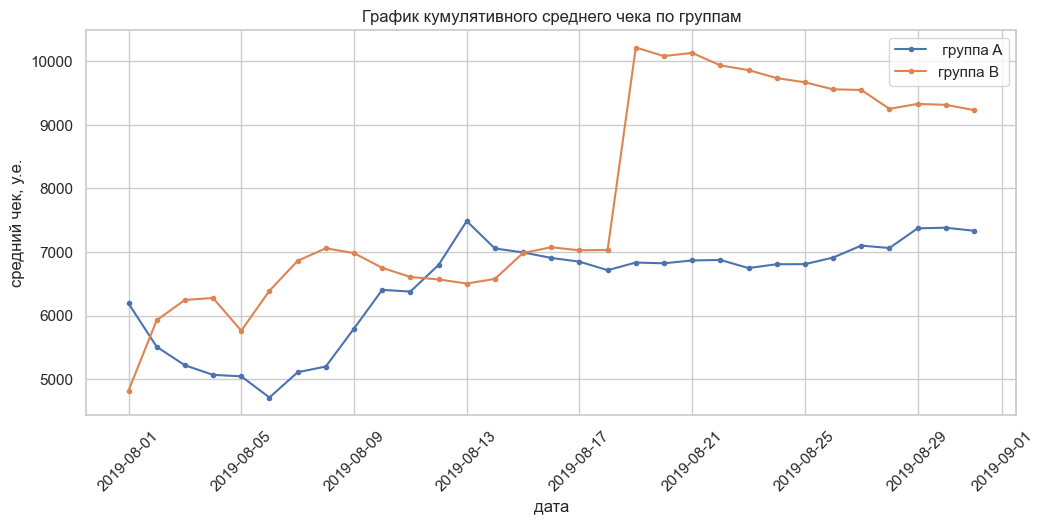

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(
    data['date'], 
    data['revenue_cummulative_A']/data['orders_cummulative_A'],
    '-o', 
    markersize=3, 
    label=' группа A'
)
plt.plot(
    data['date'], 
    data['revenue_cummulative_B']/data['orders_cummulative_B'], 
    '-o', 
    markersize=3, 
    label='группа B'
)
plt.legend() 
plt.xticks(rotation= 45)

plt.xlabel('дата')
plt.ylabel('средний чек, у.е.')
plt.title('График кумулятивного среднего чека по группам')

plt.show();

На основании полученного графика можно выделить, что в начале анализируемого периода средний чек группы А выше, на отметке 06.08.2019 он достигает своего минимума. В группе В же, наоборот, заметно скачкообразное увеличение. 

Приблизительно с 14.08.2019 для группы А средний чек стабилизировался и не было значительного подъема или снижения, как в начале исследуемого периода. В группе В средний чек также начинал стабилизироваться, однако крупный заказ поднял его значительно вверх. Но после средний чек имеет тенденцию к снижению, в отличие от группы А. 

Таким образом, если абстрагироваться от выброса, то параметр среднего кумулятивного чека у группы В, несмотря на значительный отрыв на графике, имеет тенденцию к снижению, у группы А к росту. Но данная метрика очень чувствительна к выбросам количества покупателей или выручки.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
<a id="analysis3"></a> 

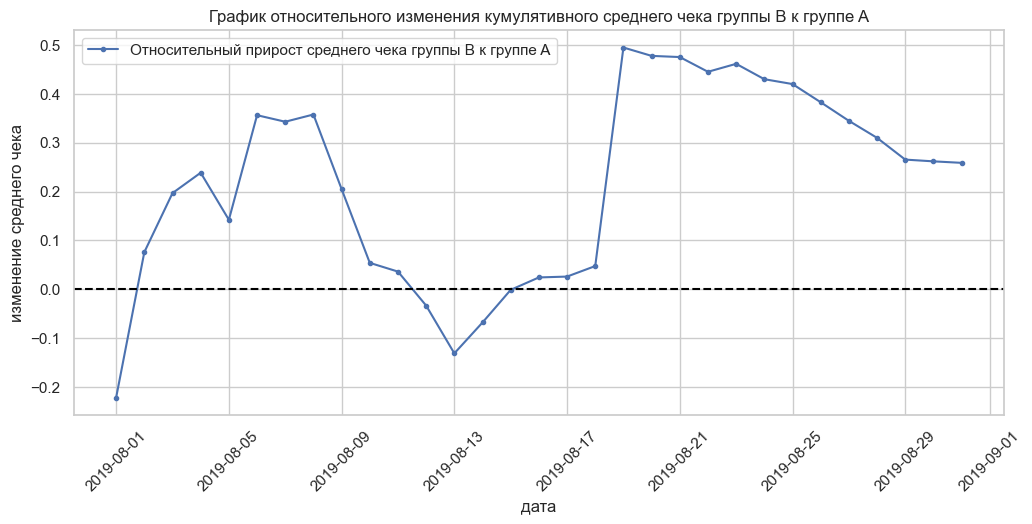

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(
    data['date'], 
    (data['revenue_cummulative_B']/data['orders_cummulative_B'])/
    (data['revenue_cummulative_A']/data['orders_cummulative_A'])-1,
     '-o', 
    markersize=3,
    label="Относительный прирост среднего чека группы B к группе A"
)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation= 45)
plt.legend()

plt.xlabel('дата')
plt.ylabel('изменение среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.show();

Рассмотрев полученный график, можно сделать вывод, что кумулятивный средний чек группы В относительно группы А два раза за исследуемый период имел превышение: первый со 02.08.2019 по 11.08.2019 и с 16.08.2019. Превышение в последнюю дату явно было вызвано найденным крупным по сумме заказом. 

Далее происходит планомерное снижение. Несмотря на то, что изменение среднего кумулятивного чека группы В к группе А в нескольких промежутках времени превысило отметку в 3, а также в 4 раза, на данном этапе сложно точно отметить явное лидерство группы В над группой А, так как есть вероятность, что метрика так и продолжит снижаться.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
<a id="analysis4"></a> 

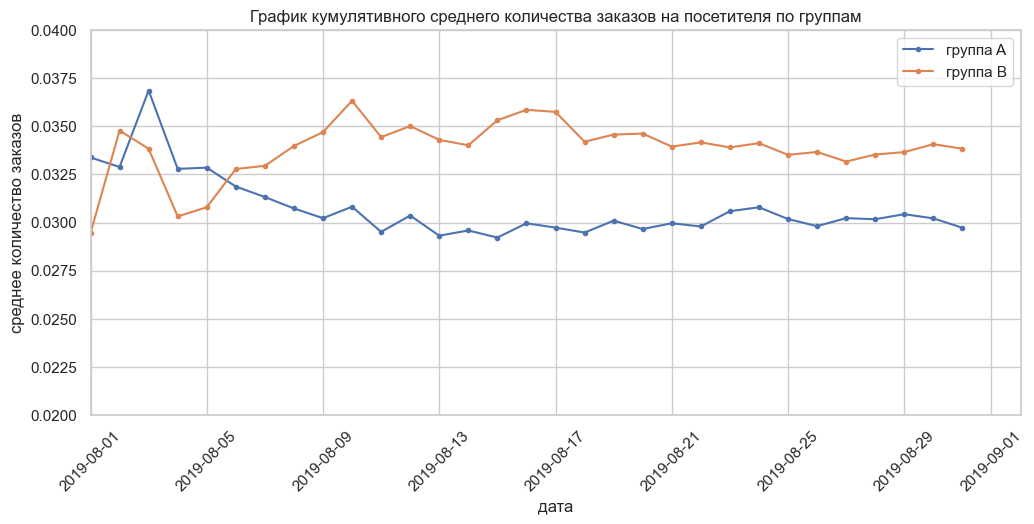

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(
    data['date'], 
    data['orders_cummulative_A']/data['visitors_cummulative_A'], 
    '-o', 
    markersize=3,
    label='группа A'
)
plt.plot(
    data['date'], 
    data['orders_cummulative_B']/data['visitors_cummulative_B'], 
    '-o', 
    markersize=3,
    label='группа B'
)

plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 2), 0.02, 0.04]) 
plt.xticks(rotation= 45)

plt.xlabel('дата')
plt.ylabel('среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.show();

Исходя из составленного графика можно отметить:

изначально кумулятивное среднее количество заказов на посетителя у группы А выше, чем у группы В. 06.08.2019 группы сравнялись, а после лидерство уже перенимает группа В.

Стабилизированные метрики происходит приблизительно со второй половины исследуемого периода. Также и у одной и у второй группы к концу исследования заметна тенденция к снижению метрики, однако у группы В она меньше.

В конечной дате исследования кумулятивное среднее количество заказов на посетителя у группы А составляет около 3%, а у группы В - около 3,3%.

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
<a id="analysis5"></a> 

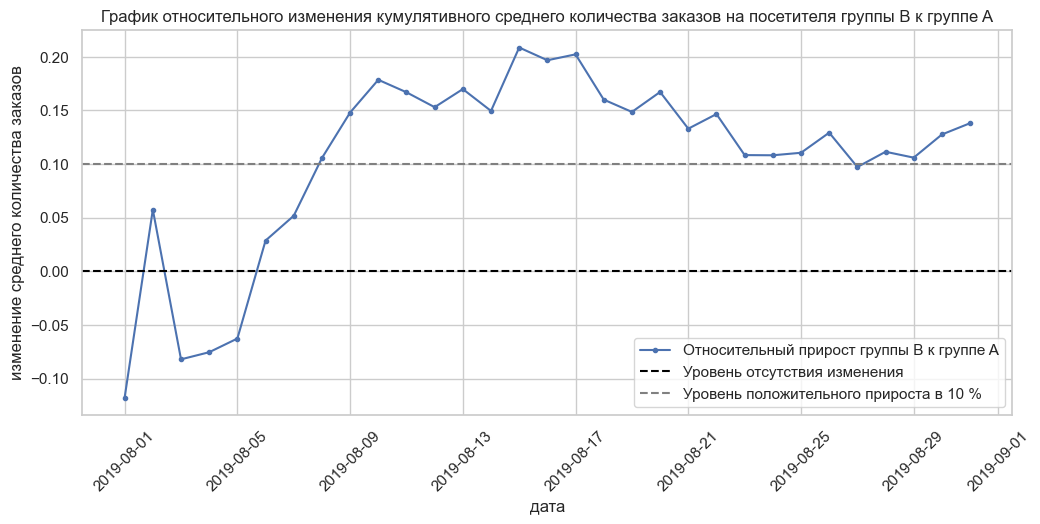

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(
    data['date'], 
    (
        (data['orders_cummulative_B']/data['visitors_cummulative_B'])/
     (data['orders_cummulative_A']/data['visitors_cummulative_A']) - 1
    ), 
    '-o', 
    markersize=3,
    label="Относительный прирост группы B к группе A"
)
plt.axhline(y=0, color='black', linestyle='--', label="Уровень отсутствия изменения")
plt.axhline(y=0.1, color='grey', linestyle='--', label="Уровень положительного прироста в 10 %")
plt.xticks(rotation= 45)
plt.legend()

plt.xlabel('дата')
plt.ylabel('изменение среднего количества заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.show();

На основании полученного графика можно выделить, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Начиная с 06.08.2019 показатель постоянно рос. 

К концу исследования изменение среднего количества заказов на посетителя установилось и заметна тенденция к росту. 

Можно с уверенностью сказать, что относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A имеет положительный прирост свыше 10% в конце исследования, а в течение всего рассматриваемого периода несколько дней превышал 20%.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
<a id="analysis6"></a> 

In [25]:
#составим таблицу с числом заказов по уникальным пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']

orders_by_users.sort_values('orders', ascending=False).head(6)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5


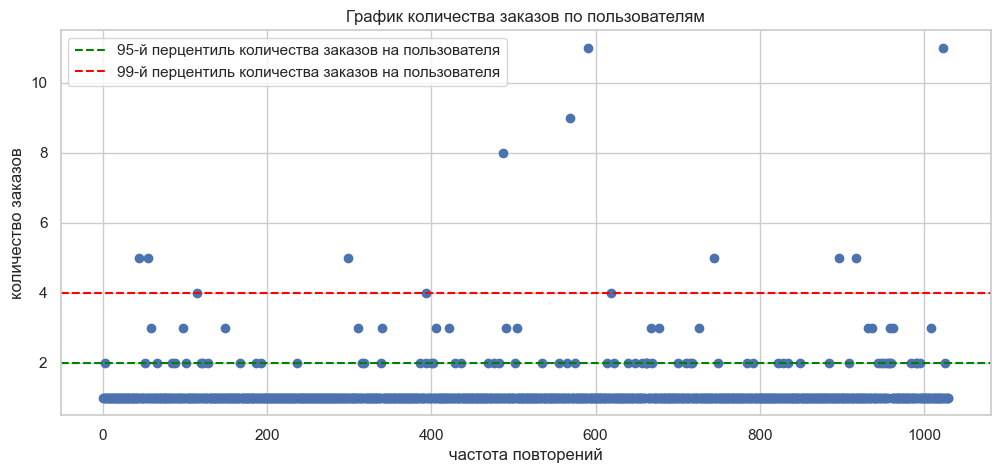

In [26]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12, 5))
plt.scatter(x_values, orders_by_users['orders']) 

plt.axhline(y=np.percentile(orders_by_users['orders'], [95]), color='green', \
            linestyle='--', label="95-й перцентиль количества заказов на пользователя")
plt.axhline(y=np.percentile(orders_by_users['orders'], [99]), color='red', \
            linestyle='--', label="99-й перцентиль количества заказов на пользователя")
plt.legend()

plt.xlabel('частота повторений')
plt.ylabel('количество заказов')
plt.title('График количества заказов по пользователям')

plt.show();

Сгруппировав данные, а также рассмотрев их распределение на диаграмме рассеяния можно выделить, что наибольшее количество пользователей за период исследования совершили 1 заказ, значительно меньше пользователей совершили с 2 до 5 заказов и с увеличением количества заказов их частота значительно сокращается. Также на графике можно наблюдать выбросы в 8-10 заказов.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
<a id="analysis7"></a> 

In [27]:
print('Колличество заказов, которое оформили не более 5% пользователей:', np.percentile(orders_by_users['orders'], [95]))

print('Колличество заказов, которое оформили не более 1% пользователей:',np.percentile(orders_by_users['orders'], [99]))

Колличество заказов, которое оформили не более 5% пользователей: [2.]
Колличество заказов, которое оформили не более 1% пользователей: [4.]


Рассчитав 95 и 99 перцентили количества заказов на пользователя:

- менее 5% пользователей совершили более 2 заказов.

- менее 1% пользователей совершили более 4 заказов.

Исходя из этих данных в качестве границы для определения аномальных пользователей выберем 99 перцентиль, а именно отсеем пользователей, совершивших более 4 заказов.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
<a id="analysis8"></a> 

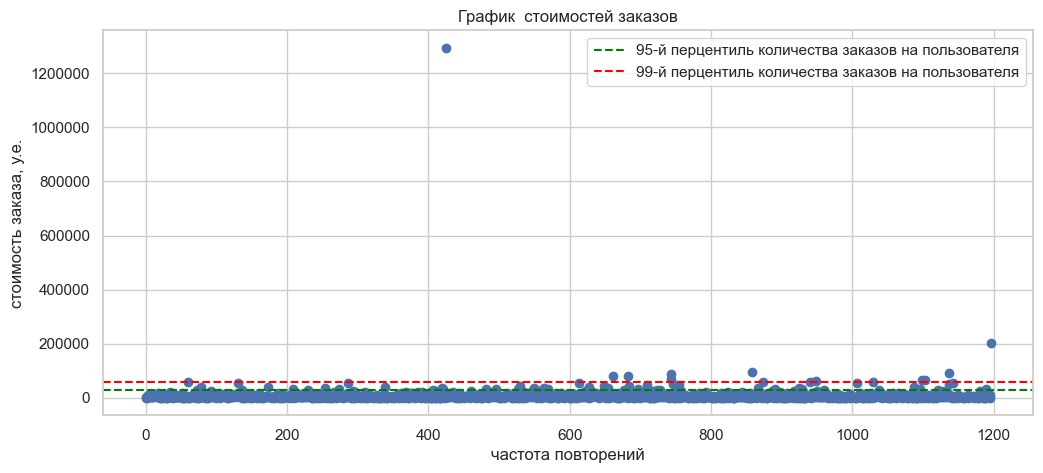

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12, 5))
plt.scatter(x_values, orders['revenue']) 

plt.axhline(y=np.percentile(orders['revenue'], [95]), color='green', linestyle='--', label="95-й перцентиль количества заказов на пользователя")
plt.axhline(y=np.percentile(orders['revenue'], [99]), color='red', linestyle='--', label="99-й перцентиль количества заказов на пользователя")
plt.legend()
plt.ticklabel_format(axis='y', useOffset=False, style='plain')

plt.xlabel('частота повторений')
plt.ylabel('стоимость заказа, у.е.')
plt.title('График  стоимостей заказов')

plt.show();

На графике заметно, что большая часть заказов сосредоточилась в самом начале диапазона стоимости на графике. В основном заказы не выбиваются от отметки примерно 50000 у.е. 

Также можно отметить несколько явно, превышающих среднюю стоимость, заказов. Один из них с суммой более 1 млн. у.е. был обнаружен ранее, второй, по графику, превышает отметку в 200 тыс. у.е. за заказ.


#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
<a id="analysis9"></a> 

In [29]:
print('Cтоимость заказов, которые оформили не более 5% пользователей:', np.percentile(orders['revenue'], [95]))
      
print('Cтоимость заказов, которые оформили не более 1% пользователей:', np.percentile(orders['revenue'], [99]))

Cтоимость заказов, которые оформили не более 5% пользователей: [28000.]
Cтоимость заказов, которые оформили не более 1% пользователей: [58233.2]


Рассчитав 95 и 99 перцентили стоимости заказов пользователей:

менее 5% пользователей совершили заказы на сумму более, чем 28000 у.е.

менее 1% пользователей совершили заказы на сумму более, чем 58233.2 у.е.

Исходя из этих данных в качестве границы для определения аномальных пользователей выберем 99 перцентиль, а именно отсеем пользователей, совершивших заказ на сумму белее, чем 58233.2 у.е.. Далее округлим до 58 тыс.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="analysis10"></a> 

Сформулируем гипотезы. 

**Нулевая гипотеза: Н0 = Различий в среднем количестве заказов на посетителя между группами А и В нет.**

**Альтернативная гипотеза: H_a: = Различия в среднем количестве заказов на посетителя между группами А и В есть.**

В качестве уровня критической значимости установим 0.05

В случае, когда в данных есть большие выбросы, следует применять тест, основанный на структурном подходе(Непараметрический тест Уилкоксона-Манна-Уитни).
    
Метод, который будем применять для A/B-тестирования - **st.mannwhitneyu().**</div>
   

In [30]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']


#создадим выборки для теста по каждой группе
sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

    
print('Значение p-value:',"{0:.4f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

print(
    'Относительный прирост среднего числа заказов группы B:', 
    "{0:.4f}".format(sample_B.mean() / sample_A.mean() - 1)
)

Значение p-value: 0.0168
Относительный прирост среднего числа заказов группы B: 0.1381


По «сырым» данным различия в среднем количестве заказов на посетителя между группами А и В есть. 

Значение p-value меньше уровня критической значимости - 0.05. Следовательно, **нулевую гипотезу: "Различий в среднем количестве заказов на посетителя между группами А и В нет" отвергаем.** 

Относительный прирост среднего числа заказов группы B составил 13.81%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="analysis11"></a> 

Сформулируем гипотезы. 

**Нулевая гипотеза: Н0 = Различий в среднем чеке заказа между группами А и В нет.**

**Альтернативная гипотеза: H_a: = Различия  в среднем чеке заказа между группами А и В есть.**

В качестве уровня критической значимости установим 0.05

In [31]:
print(
    'Значение p-value:',
    '{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
)
print(
    'Относительный прирост среднего числа заказов группы B:', 
    '{0:.4f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
) 


Значение p-value: 0.7293
Относительный прирост среднего числа заказов группы B: 0.2587


По «сырым» данным различий  среднем чеке заказа между группами А и В нет.

p-value = 0.7293 больше уровня критической значимости - 0.05. Следовательно, **нулевую гипотезу: "Различий в среднем чеке заказа между группами А и В нет" не отвергаем.**

Однако относительный прирост среднего числа заказов группы B составил 25.87%, такой сильный прирост можно объяснить несколькими выбросами в заказах с большой суммой.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="analysis12"></a> 

Очистим данные от аномальных пользователей, попавших сразу в 2 группы.

In [32]:
orders_filtered = orders.query('visitor_id not in @non_ID')

In [33]:
#составим таблицу с числом заказов по уникальным пользователям после удаления пользователей попавших сразу в 2 группы.
orders_by_users_A_f = (
    orders_filtered[orders_filtered['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A_f.columns = ['user_id', 'orders']

orders_by_users_B_f = (
    orders_filtered[orders_filtered['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B_f.columns = ['user_id', 'orders']

In [34]:
#количество пользователей в каждой группе после "очистки"
display(orders_filtered.groupby('group')['visitor_id'].nunique())

group
A    445
B    528
Name: visitor_id, dtype: int64

После исключения пользователей попавших сразу в 2 группы. Количество пользователей в группе А изменилось с 503 до 445, а в группе В с 586 до 528. Данное распределение все еще является неравномерным.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58000 у.е. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. 

In [35]:
#сделаем срезы пользователей с числом заказов больше 4 
users_with_many_orders = pd.concat(
    [
        orders_by_users_A_f[orders_by_users_A_f['orders'] > 4]['user_id'],
        orders_by_users_B_f[orders_by_users_B_f['orders'] > 4]['user_id']
    ],
    axis=0,
)
users_with_expensive_orders = orders_filtered[orders_filtered['revenue'] > 58000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [36]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A_f[
            np.logical_not(orders_by_users_A_f['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_A'].sum() - len(orders_by_users_A_f['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B_f[
            np.logical_not(orders_by_users_B_f['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_B'].sum() - len(orders_by_users_B_f['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('Значение p-value:', '{0:.4f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print(
    'Относительный прирост среднего числа заказов группы B:',
    '{0:.4f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)
) 


Значение p-value: 0.0097
Относительный прирост среднего числа заказов группы B: 0.1637


Результаты по среднему количеству заказов на посетителя между группами после «чистки» изменились следующим образом.

Значение p-value уменьшилось и теперь составляет 0.0097, что еще сильнее показывает на различие в среднем количестве заказов между группами.

Также более, чем на 2.5 процентных пункта вырос относительный прирост среднего числа заказов группы B и теперь составляет 16.37%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="analysis13"></a> 

In [37]:
print(
    'Значение p-value:',
    '{0:.4f}'.format(
        stats.mannwhitneyu(
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'A',
                    np.logical_not(orders_filtered['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'B',
                    np.logical_not(orders_filtered['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего числа заказов группы B:',
    "{0:.4f}".format(
        orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'B',
                np.logical_not(orders_filtered['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'A',
                np.logical_not(orders_filtered['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value: 0.9007
Относительный прирост среднего числа заказов группы B: -0.0316


Результаты по среднему чеку заказа между группами после «чистки» изменились следующим образом.

Значение p-value увеличилось. Оно находится на крайне высоком уровне и показывает отсутствие различий в среднем чеке заказа между группами.

Относительный прирост среднего чека после устранения выбросов с крайне высокой суммой заказа, изменился с 25.87% до -3.16% 

#### Примите решение по результатам теста и объясните его. 
<a id="analysis14"></a> 

**Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**По итогам тестирования:**

- Наблюдается статистически значимое различие по среднему количеству заказов на посетителя между группами А и В как по «сырым», так и по данным после фильтрации аномалий. По данному параметру преимущество одержала тестовая группа В;

- Нет статистически значимого различия по среднему чеку между группами А и В ни по «сырым», ни по данным после фильтрации аномалий. Однако негативного значительного изменения группы В в сравнении с группой А текст также не показал;


- График различия среднего количества заказов между группами сообщает, что результаты группы B уже с 6 дня исследования стали лучше, чем у группы A, также показатель имел хорошую динамику на протяжении всего периода исследования;

- График различия среднего чека говорит о том, что результаты группы B не показали каких-либо значимых отличий от группы А. 




**Несмотря на то, что графики среднего чека не стабилизировались, отсутствуют статистически значимые различия по среднему чеку в сырых данных, а также в очищенных данных, тест следует остановить и признать его успешным, зафиксировав победу группы В. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент параметр среднего чека приобретет значительные изменения крайне низкая.**

### Выводы по исследованию
<a id="rec"></a> 

**Подводя итоги исследования, необходимо выделить следующее:**


- При анализе данных, было выявлено, что 58 пользователей с уникальным 'visitor_id' на протяжении исследуемого периода попали как в одну, так и во вторую группу. Следовательно механизм распределения в группы работает некорректно.


- Также распределение пользователей между группами имеет явно выраженный перевес в сторону группы B.


- Рассчитав приоритезацию гипотез по фреймворку ICE и RICE среди тройки лидеров и по одному, и по второму были гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Следовательно, можно отдать предпочтение им.


- На протяжении всего рассматриваемого периода группа В превосходит группу А по нескольким показателям: кумулятивной выручки, кумулятивного среднего количества заказов на посетителя. По показателю среднего чека значительных изменений между группами не наблюдалось.


- Гипотезу: "Различий в среднем количестве заказов на посетителя между группами А и В нет" отвергаем как по "сырым", так и по отфильтрованным данным.


- Гипотезу: "Различий в среднем чеке заказа между группами А и В нет" не отвергаем как по "сырым", так и по отфильтрованным данным.


**Таким образом, продолжать далее тест смысла нет. Следует остановить тест, зафиксировав победу группы В.**